# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [16]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import pandas as pd
import numpy as np

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#regressão logística 1
import statsmodels.api as sm


#regressão logística 2
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# métricas usadas para classificacao
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

In [17]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [18]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

O conjunto de dados traz biomarcadores obtidos atráves de exames de sangue que apresentam variações em pacientes com câncer de mama vs pacientes saudáveis. É proposto pelos pesquisadores que modelos de predição com bases nesses dados podem ser aliados nos exames de rotina para avaliar a possibilidade de uma paciente ter câncer sem precisar de um exame invasivo e doloroso como a mamografia. 

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

<AxesSubplot:xlabel='Classification', ylabel='MCP.1'>

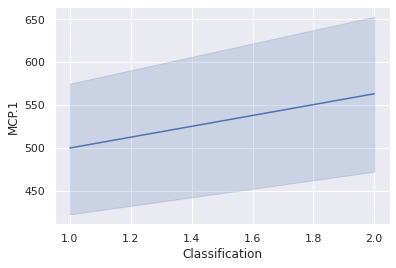

In [20]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

sns.set_theme(style="darkgrid")

sns.lineplot(x='Classification', y='MCP.1', data=data)


<AxesSubplot:xlabel='Classification', ylabel='Adiponectin'>

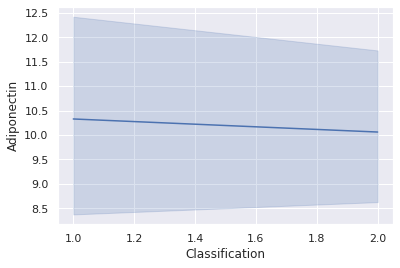

In [21]:
sns.lineplot(x='Classification', y='Adiponectin', data=data)

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

Como o conjunto de dados busca averiguar a probabilidade de um paciente ter ou não câncer de mama com base em biomarcadores, é interessante visualizar a correlação entre os valores encontrados em pacientes saudáveis e pacientes com câncer. 

Com base nos gráficos acima, é possível perceber que há uma tendência da Adiponectina diminuir em pacientes com câncer (classificados como "2" no eixo X), o que vai ao encontro de outros estudos disponíveis na literatura médica [como este aqui.](https://biomedres.us/fulltexts/BJSTR.MS.ID.003091.php#:~:text=A%20low%20serum,adiponectin%20level%20%5B46%5D.) Já no caso da proteína MCP.1, esta é responsável pela regulação do sistema imunológico e sua quantidade no sangue tende a aumentar em casos de infecções uma vez que o sistema imunológico está ativamente produzindo e recrutando monócitos, neutrófilos e linfócitos, como foi explicado [neste outro artigo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2755091/).

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

1. O que você percebe na visualização? 

R: Realmente, os gráficos mostram a tendência informada no texto.

2. Quais perguntas você tem sobre o conjunto de dados?

R: A idade e a presença de câncer estão relacionados?

3. Há algo que você não entende nas visualizações?

R: Não.

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Cruzaria idade e classificação para determinar se a idade é um fator determinante na presença de câncer.

Apresente suas nova(s) visualização(ões) a partir do feedback:

In [22]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

data.corr()['Age']['Classification']

-0.04355468131279947

Com base nos dados acima, é possível perceber que a correlação entre Idade e Presença de Câncer é baixa: -0.04355468131279947.
Uma possível resposta para isso é que o conjunto de dados não é balanceado (isto é, não tem a mesma quantidade de observações em cada idade).

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [23]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

#preparando dados
X = data.drop(['Classification'], axis=1)
y = data['Classification']

#tratando os dados
y = np.array(y)
y[y == 2] = 0 # com câncer
y[y == 1] = 1 # sem câncer


In [24]:

#modelo
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.493418
         Iterations 9


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [25]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.2826
Time:                        23:34:25   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0284      0.015      1.887      0.059      -0.001       0.058
BMI             0.1767      0.065      2.729      0.006       0.050       0.304
Glucose        -0.0582      0.021     -2.801    

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [26]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.35, random_state=10)

#treinamento do modelo
lr = LogisticRegression(random_state=10).fit(X_train, y_train)

#teste do modelo
y_pred = lr.predict(X_test)

Coloque abaixo a matriz de confusão do modelo feito:

In [27]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_pd = pd.DataFrame(conf_mat, 
             columns=["Sem Câncer (Modelo)","Com Câncer (Modelo)",],
             index  =["Sem Câncer (Real)", "Com Câncer (Real)"])

Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [28]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

#Especificidade — TN/(TN + FP)
especificidade = conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1])
print(especificidade)

0.84


In [29]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
#que mané format mermão
print(f'acurácia: {accuracy:.2f}')
print(f'precisão: {precision[0]:.2f}')
print(f'especificidade: {especificidade:.2f}')
print(f'sensitividade: {recall[0]:.2f}')

acurácia: 0.85
precisão: 0.91
especificidade: 0.84
sensitividade: 0.84


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

In [30]:
conf_mat_pd

,Sem Câncer (Modelo),Com Câncer (Modelo)
Sem Câncer (Real),21,4
Com Câncer (Real),2,14


**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Considerando a matriz de confusão acima, o modelo de regressão logística construído obteve mais erros do tipo I (falso positivo) com 4 erros contra apenas 2 erros do tipo II (falso negativo).